In [28]:
import pickle 
import csv
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import gc

In [29]:
# model_list = glob.glob('./models/*.bin')

# for m in model_list:
#     print(m)
#     model = pickle.load(open(m,'rb'))
#     version = m.split('_')[2]
#     fold = model_list[0].split('_')[8][0]
#     performance_train = model.best_score['training']['rmse']
#     performance_test = model.best_score['valid_1']['rmse'] if 'valid_1' in  model.best_score else 0
    
#     with open(r'./models/perf_leaked.csv', 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow([m, fold, performance_train, performance_test, 0])

In [30]:
df = pd.read_csv('./models/perf_leaked.csv')
df = df[df['fold']!='avg']
df = df.set_index('name')
df['diff'] = df['test'] - df['train']

df['by_meter'] = df.index.str.contains('meter')
df['meter'] = np.where(df['by_meter'],pd.Series(df.index).apply(lambda x: x.split('_')[2]), -1)

In [32]:
# df['boosting_type'] = np.nan
# df['learning_rate'] = np.nan
# df['colsample_bytree'] = np.nan
# df['max_bin'] = np.nan
# df['num_trees'] = np.nan
# df['num_leaves'] = np.nan
# df['n_features'] = np.nan

# for m in df.index:
# #     print(m)
#     if os.path.isfile(m):
#         model = pickle.load(open(m,'rb'))
        
#         df.loc[m,'num_trees'] = model.num_trees()
#         df.loc[m,'boosting_type'] = model.params['boosting_type']
#         df.loc[m,'learning_rate'] = model.params['learning_rate']
#         df.loc[m,'colsample_bytree'] = model.params['colsample_bytree']
#         df.loc[m,'max_bin'] = model.params['max_bin']
#         df.loc[m,'num_leaves'] = model.params['num_leaves']
#         df.loc[m,'n_features'] = model.num_feature()

#         gc.collect()
        

version          10        11        12        13        14        15  \
fold                                                                    
0    test  0.736824  0.762034  0.737847  0.736597  0.738268  0.739664   
1    test  0.739549  0.764252  0.742438  0.739658  0.741297  0.741929   
2    test  0.719841  0.749929  0.717471  0.723932  0.720893  0.719346   
3    test  0.661341  0.694574  0.665213  0.661837  0.663229  0.664419   
4    test  0.736960  0.768700  0.728164  0.732785  0.736053  0.736616   

version      15_bis        16        18        19        22        23  \
fold                                                                    
0    test  0.738147  0.841693  0.902338  0.739783  0.748460  0.749407   
1    test       NaN  0.913970  0.907730  0.741586  0.755425  0.755618   
2    test       NaN  0.837871  0.833646       NaN       NaN  0.737061   
3    test       NaN  0.860557  0.852097       NaN       NaN       NaN   
4    test       NaN  0.913677  0.911804       NaN 

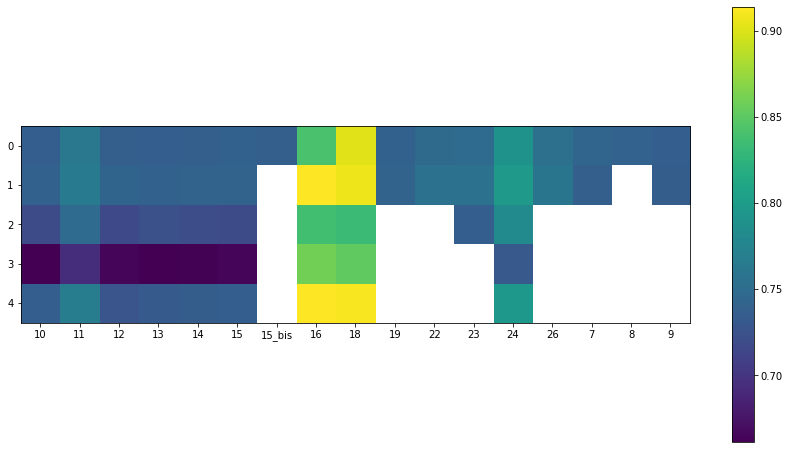

In [33]:
all_df = df[~df['by_meter']]

m = all_df.groupby(['version','fold'])[['test']].mean().stack().unstack('version')
m = m.drop(columns='17')
print(m)
# m = m.apply(lambda x: (x-m.min(axis=1))/(m.max(axis=1)-m.min(axis=1)))
fig, ax = plt.subplots(figsize = (15,8))
im = ax.imshow(m)
ax.set_xticks(range(len(m.columns)))
ax.set_xticklabels(m.columns)
plt.colorbar(im)
plt.show()

version          10        11        12        13        14        15  \
fold                                                                    
0    diff  0.156909  0.125251  0.157973  0.158265  0.159055  0.156445   
1    diff  0.163298  0.129643  0.164501  0.162887  0.164027  0.160496   
2    diff  0.142037  0.111231  0.141322  0.145815  0.141125  0.138392   
3    diff  0.081206  0.052874  0.082492  0.082145  0.082869  0.077864   
4    diff  0.154101  0.127642  0.144969  0.151142  0.151839  0.149487   

version      15_bis        16        18        19        22        23  \
fold                                                                    
0    diff  0.158495  0.065449  0.045243  0.157167  0.144445  0.144801   
1    diff       NaN  0.045646  0.046465  0.161040  0.152373  0.152520   
2    diff       NaN  0.055587  0.060311       NaN       NaN  0.134296   
3    diff       NaN -0.017889 -0.016452       NaN       NaN       NaN   
4    diff       NaN  0.047790  0.051187       NaN 

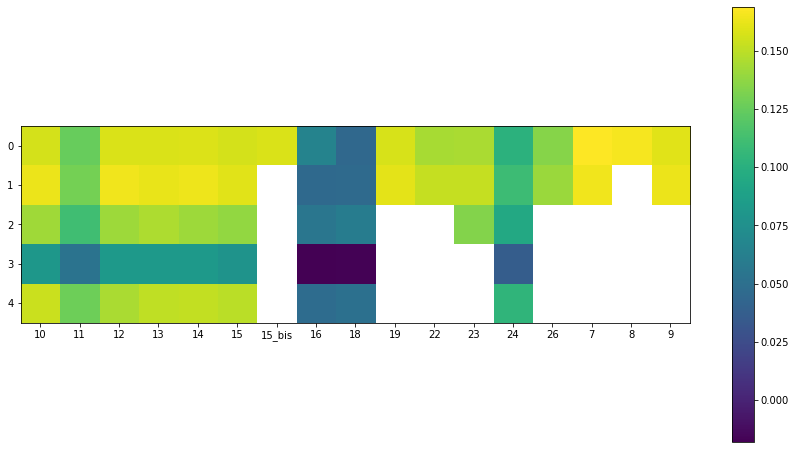

In [34]:
all_df = df[~df['by_meter']]

m = all_df.groupby(['version','fold'])[['diff']].mean().stack().unstack('version')
m = m.drop(columns='17')
# m = m.apply(lambda x: (x-m.min(axis=1))/(m.max(axis=1)-m.min(axis=1)))
print(m)
fig, ax = plt.subplots(figsize = (15,8))
im = ax.imshow(m)
ax.set_xticks(range(len(m.columns)))
ax.set_xticklabels(m.columns)
plt.colorbar(im)
plt.show()

In [35]:
by_meter = df[df['by_meter']]
by_meter.groupby(['meter','version','fold'])[['test']].mean().stack().unstack('version')

version                25        26        27        28        29        30  \
meter fold                                                                    
0     0    test  0.282963  0.289681  0.340515  0.315111  0.338620  0.332354   
      1    test  0.322103  0.326965  0.369473  0.348453  0.368737  0.363564   
      2    test  0.354931  0.357240  0.395188  0.377279  0.394866  0.389595   
      3    test  0.254142  0.258314  0.315286  0.289876  0.314264  0.308777   
      4    test  0.312536  0.315139  0.364422  0.343828  0.365266  0.359585   
1     0    test  0.915354  0.934471  1.053978  1.011984  1.070731  1.050270   
      1    test  0.869995       NaN  1.018382  0.971522  1.032066  1.009189   
      2    test  0.829396       NaN  0.982778  0.932732  1.000518  0.974974   
      3    test  0.779735       NaN  0.934654  0.892119  0.958806  0.929945   
      4    test  0.923153       NaN  1.062682  1.020983  1.085586  1.056809   
2     0    test  1.006729       NaN  1.093196  1.061534  1.112630  1.092033   
      1    test  1.082909       NaN  1.167013  1.136047  1.178003  1.163718   
      2    test  0.999330       NaN  1.102179  1.061083  1.123551  1.091383   
      3    test  0.903049       NaN  1.013497       NaN  1.033142  1.004649   
      4    test  0.978661       NaN  1.073687       NaN  1.097508  1.073218   
3     0    test  1.176915       NaN  1.245341       NaN  1.260422  1.246593   
      1    test  1.164815       NaN  1.231171       NaN  1.238162  1.226270   
      2    test  1.141760       NaN  1.214982       NaN  1.222828  1.210912   
      3    test  1.168792       NaN  1.248088       NaN  1.263322  1.244548   
      4    test  1.099159       NaN  1.183317       NaN  1.205946  1.180248   

version                31        32        33        34        35  
meter fold                                                         
0     0    test  0.331712  0.330214  0.303411  0.294664  0.319931  
      1    test  0.334503  0.335393       NaN  0.327958  0.351230  
      2    test  0.391402  0.390993       NaN  0.359505  0.378599  
      3    test  0.307753  0.307403       NaN  0.267501       NaN  
      4    test  0.330002  0.330202       NaN  0.324570       NaN  
1     0    test  0.981685  0.983048       NaN  0.925763       NaN  
      1    test  0.943558       NaN       NaN  0.880405       NaN  
      2    test  0.901495       NaN       NaN  0.841620       NaN  
      3    test  0.859180       NaN       NaN  0.794751       NaN  
      4    test  0.989896       NaN       NaN  0.916486       NaN  
2     0    test  1.039947       NaN       NaN  1.009120       NaN  
      1    test  1.121007       NaN       NaN  1.093234       NaN  
      2    test  1.040577       NaN       NaN  1.011153       NaN  
      3    test  0.951580       NaN       NaN  0.919267       NaN  
      4    test  1.017445       NaN       NaN  0.989794       NaN  
3     0    test  1.194371       NaN       NaN  1.184032       NaN  
      1    test  1.182235       NaN       NaN  1.172986       NaN  
      2    test  1.157872       NaN       NaN  1.144820       NaN  
      3    test  1.184881       NaN       NaN  1.173738       NaN  
      4    test  1.116257       NaN       NaN  1.104388       NaN

In [39]:
by_meter = df[df['by_meter']]
by_meter.groupby(['meter','version','fold'])[['diff']].mean().stack().unstack('version')

version                25        26        27        28        29        30  \
meter fold                                                                    
0     0    diff  0.095341  0.083995  0.009335  0.031931  0.006250  0.007164   
      1    diff  0.133248  0.113614  0.043051  0.067147  0.040087  0.042869   
      2    diff  0.157428  0.145512  0.072880  0.098282  0.070154  0.071187   
      3    diff  0.050149  0.041952 -0.019989  0.002900 -0.023708 -0.022775   
      4    diff  0.122926  0.099968  0.038885  0.062839  0.036592  0.037689   
1     0    diff  0.373841  0.342042  0.176306  0.226781  0.166327  0.185037   
      1    diff  0.329074       NaN  0.142332  0.190979  0.126340  0.140883   
      2    diff  0.285791       NaN  0.101142  0.142140  0.086132  0.098803   
      3    diff  0.238860       NaN  0.047691  0.097688  0.040440  0.053095   
      4    diff  0.378269       NaN  0.181331  0.229412  0.174151  0.186942   
2     0    diff  0.281738       NaN  0.120751  0.173731  0.120929  0.126216   
      1    diff  0.363596       NaN  0.208005  0.251370  0.194108  0.208704   
      2    diff  0.274801       NaN  0.132724  0.174500  0.130796  0.129589   
      3    diff  0.175261       NaN  0.029866       NaN  0.024925  0.026791   
      4    diff  0.246602       NaN  0.087745       NaN  0.093940  0.094800   
3     0    diff  0.373064       NaN  0.155566       NaN  0.152344  0.159613   
      1    diff  0.360984       NaN  0.142787       NaN  0.134169  0.141200   
      2    diff  0.336111       NaN  0.119196       NaN  0.112090  0.118819   
      3    diff  0.369914       NaN  0.162473       NaN  0.159403  0.161720   
      4    diff  0.286423       NaN  0.082028       NaN  0.083360  0.080242   

version                31        32        33        34        35  
meter fold                                                         
0     0    diff  0.025959  0.025177  0.057037  0.088252  0.048273  
      1    diff  0.096034  0.095611       NaN  0.120427  0.079569  
      2    diff  0.090062  0.089723       NaN  0.153344  0.110168  
      3    diff -0.001025 -0.001799       NaN  0.057141       NaN  
      4    diff  0.089589  0.090139       NaN  0.117465       NaN  
1     0    diff  0.271629  0.272470       NaN  0.381106       NaN  
      1    diff  0.230587       NaN       NaN  0.337342       NaN  
      2    diff  0.188640       NaN       NaN  0.295335       NaN  
      3    diff  0.146147       NaN       NaN  0.249732       NaN  
      4    diff  0.271779       NaN       NaN  0.368087       NaN  
2     0    diff  0.212162       NaN       NaN  0.286290       NaN  
      1    diff  0.295051       NaN       NaN  0.371670       NaN  
      2    diff  0.214351       NaN       NaN  0.287097       NaN  
      3    diff  0.119423       NaN       NaN  0.188851       NaN  
      4    diff  0.185055       NaN       NaN  0.256845       NaN  
3     0    diff  0.276691       NaN       NaN  0.354531       NaN  
      1    diff  0.267490       NaN       NaN  0.383621       NaN  
      2    diff  0.239354       NaN       NaN  0.352688       NaN  
      3    diff  0.271869       NaN       NaN  0.386604       NaN  
      4    diff  0.193256       NaN       NaN  0.309000       NaN

In [36]:
by_meter = df[df['by_meter']]
by_meter.groupby(['meter','version','fold'])[['diff']].mean().stack().unstack('version')[['27','35']]

version                27        35
meter fold                         
0     0    diff  0.009335  0.048273
      1    diff  0.043051  0.079569
      2    diff  0.072880  0.110168
      3    diff -0.019989       NaN
      4    diff  0.038885       NaN
1     0    diff  0.176306       NaN
      1    diff  0.142332       NaN
      2    diff  0.101142       NaN
      3    diff  0.047691       NaN
      4    diff  0.181331       NaN
2     0    diff  0.120751       NaN
      1    diff  0.208005       NaN
      2    diff  0.132724       NaN
      3    diff  0.029866       NaN
      4    diff  0.087745       NaN
3     0    diff  0.155566       NaN
      1    diff  0.142787       NaN
      2    diff  0.119196       NaN
      3    diff  0.162473       NaN
      4    diff  0.082028       NaN

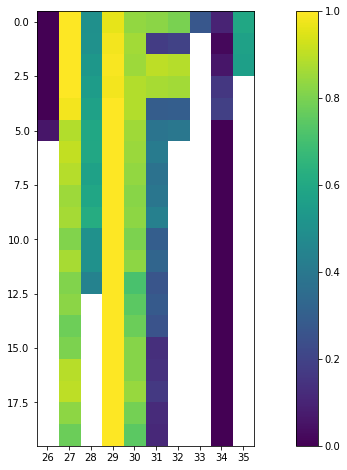

In [37]:
m = by_meter.groupby(['meter','version','fold'])[['test']].mean().stack().unstack('version')
m = m.drop(columns=['25'])
m = m.apply(lambda x: (x-m.min(axis=1))/(m.max(axis=1)-m.min(axis=1)))

fig, ax = plt.subplots(figsize = (15,8))
im = ax.imshow(m)
ax.set_xticks(range(len(m.columns)))
ax.set_xticklabels(m.columns)
plt.colorbar(im)
plt.show()

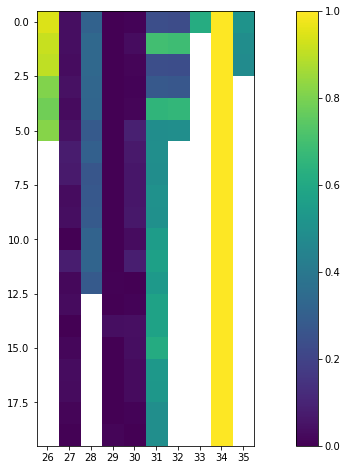

In [38]:
m = by_meter.groupby(['meter','version','fold'])[['diff']].mean().stack().unstack('version')
m = m.drop(columns=['25'])
m = m.apply(lambda x: (x-m.min(axis=1))/(m.max(axis=1)-m.min(axis=1)))

fig, ax = plt.subplots(figsize = (15,8))
im = ax.imshow(m)
ax.set_xticks(range(len(m.columns)))
ax.set_xticklabels(m.columns)
plt.colorbar(im)
plt.show()